In [1]:
## Median Filtering

In [2]:
## Set date of phenotype data for use here
filedate = 'Jan162019'

In [3]:
## Bring in needed mod
import pandas as pd

In [6]:
## set path to file, should in in the words, "curation_baselined.csv'
file_path = '../DATA/Tecan_qtlruns_%s_curated_baselined.csv.gz'%(
    filedate)

In [7]:
## Bring in data
df = pd.read_csv(file_path,index_col=0)

In [6]:
## Take column names
dfcols = df.columns.tolist()

In [7]:
## Get time start index
timeix = dfcols.index('0s')

In [8]:
## Get time columns
timepts = dfcols[timeix:]

In [9]:
## Get info columns
infos = dfcols[:timeix]

In [10]:
## Check baselining
assert df[timepts[:7]].sum(axis=1).sum() == 0

In [11]:
## Bring in needed mods
import numpy as np

In [12]:
## Write ftn for median filtering
def median_filter(Y,Kernal,padtype=None,recursive=False):
    window = int((Kernal-1)/2)
    Y = np.array(Y)
    assert len(Y[~np.isnan(Y)]) == len(Y)
    if padtype is None:
        rb = np.ones(window)*Y[0]
        re = np.ones(window)*Y[-1]
    elif padtype is 'Zero':
        rb = np.zeros(window)
        re = np.zeros(window)
    elif padtype is 'Ref':
        rb = list(Y[0] - Y[::-1] + Y[0])[-(window+1):-1]
        re = list(Y[-1] - Y[::-1] + Y[-1])[1:(window+1)]
    else:
        rb = np.zeros(window)
        re = np.ones(window)*Y[-1]
    pry = np.concatenate([rb,Y,re])
    if recursive:
        for i in np.arange(window,len(pry)-window):
            pry[i] = np.median(pry[i-window:i+window+1])
        my = pry[window:-window]
    else:
        my = np.array([np.median(pry[i-window:i+window+1]) for i in np.arange(window,len(pry)-window)])
    return my

In [13]:
## Set kerneal zise to 10 time points (1.5 hrs), around a given pt
ks = 51
## Median filter the data via the awesome ftn I wrote above! 
mdf = df[timepts].T.apply(median_filter,args=[ks]).T

In [14]:
## add info dataframe
mdfi = pd.concat([df[infos],mdf],axis=1)

In [15]:
## Bring in matplot lib
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
## Set coloring and background
plt.style.use('tableau-colorblind10')

In [17]:
## Check the parental strain SS-A837, at 37°C with 0.125 ug/ml Amph. B.
SS_A837_37_0125_ix = mdfi[(mdfi.strain=='SS-A837') 
                          & (mdfi.amphB==0.125) 
                          & (mdfi.temp==37)
                         ].index.tolist()

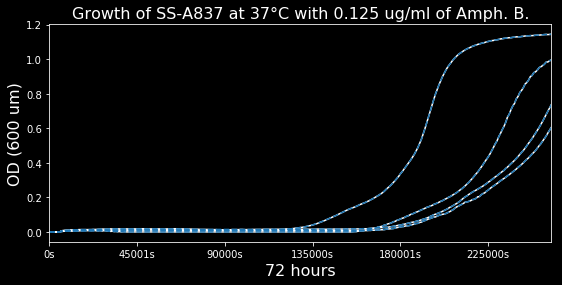

In [25]:
## Plot the parental strain SS-A837
fig, ax = plt.subplots(1,1,figsize=(9,4))
df.loc[SS_A837_37_0125_ix,timepts].T.plot(color='w',
                        legend=None,ax=ax);
mdfi.loc[SS_A837_37_0125_ix,timepts].T.plot(color='tab:blue',
                linestyle='--',legend=None,ax=ax);
plt.xlabel('72 hours',fontsize=16);
plt.ylabel('OD (600 um)',fontsize=16);
plt.title(u'Growth of SS-A837 at 37°C with 0.125 ug/ml of Amph. B.',
          fontsize=16);

In [19]:
## Save dataframe
mdfi.to_csv('../FILES/'+file_path.split('/')[-1
            ].split('.csv')[0]+'_median%s.csv'%(ks))

In [20]:
'../FILES/'+file_path.split('/')[-1
            ].split('.csv')[0]+'_median%s.csv'%(ks)

'../FILES/Tecan_qtlruns_Jan162019_curated_baselined_median51.csv'

In [21]:
temp = df[(df.strain=='XL280a') & (df.amphB==0.125) & (df.temp==30)]

In [22]:
temp

,date,row,column,plate,temp,strain,amphB,length,Instrument,saturatedOD,...,249300s,250201s,251100s,252000s,252901s,253800s,254700s,255601s,256500s,257400s
1372,Jan302018,e,6,2,30,XL280a,0.125,72,Sunrise,1.4892,...,0.6694,0.6584,0.6704,0.6584,0.6714,0.7804,0.7874,0.7784,0.7844,0.7774
1373,Feb152018,e,6,2,30,XL280a,0.125,72,Sunrise,1.7634,...,0.5784,0.5784,0.5784,0.5774,0.5764,0.5794,0.5804,0.5794,0.5814,0.5824
1374,Feb182018,e,6,2,30,XL280a,0.125,72,Moon,1.8957,...,0.5376,0.5396,0.5386,0.5376,0.5366,0.5396,0.5366,0.5376,0.5376,0.5396
1375,Mar112018,e,6,2,30,XL280a,0.125,72,Sunrise,1.8111,...,1.0686,1.0686,1.0696,1.0696,1.0696,1.0686,1.0706,1.0706,1.0706,1.0706
